In [54]:
import importlib

import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as inte

import axion_mass
import g_star
import eom_solver
import density_plot
from config import plot_path, model

eom_solver = importlib.reload(eom_solver)
density_plot = importlib.reload(density_plot)

np.warnings.filterwarnings('ignore')

In [49]:
m_a_fn = axion_mass.m_a_from_chi_general
g_model = g_star.borsamyi_table
theta_i_s, f_a_s, Omega_a_h_sq = eom_solver.compute_density_parameter((1e-5, 1e0), (1e9, 1e18), m_a_fn, g_model)

ssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssssss

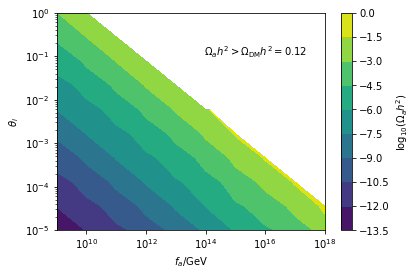

In [50]:
_ = density_plot.plot_density(theta_i_s, f_a_s, Omega_a_h_sq, plot_type="contourf")
plt.savefig(plot_path + "/numerical_qcd_relic_density_plot.pdf")

In [51]:
import qcd_axion_wkb
f_c = Omega_a_h_sq / qcd_axion_wkb.compute_analytic_relic_density(theta_i_s, f_a_s)

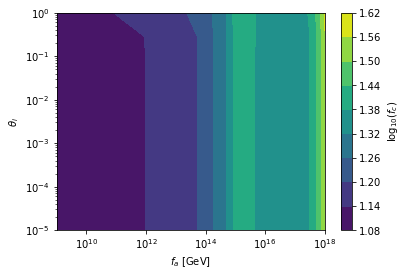

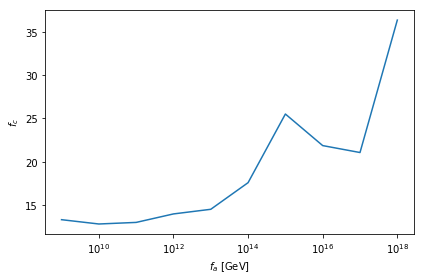

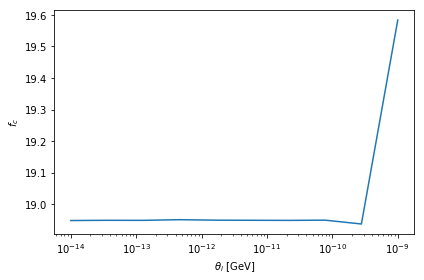

In [52]:
# plt.figure(figsize=(8,8))
#plt.subplot(2,1,1)
ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")
plt.xlabel("$f_a$ [GeV]")
plt.ylabel(r"$\theta_i$")
plt.contourf(f_a_s / 1e9, theta_i_s, np.log10(f_c))
cbar = plt.colorbar() # orientation="horizontal")
cbar.ax.set_ylabel(r"$\log_{10}(f_c)$")
plt.show()
#plt.subplot(2,1,2)
plt.xlabel("$f_a$ [GeV]")
plt.ylabel("$f_c$")
plt.semilogx(f_a_s / 1e9, np.mean(f_c, axis=0))
plt.tight_layout()
plt.show()
plt.xlabel(r"$\theta_i$ [GeV]")
plt.ylabel("$f_c$")
plt.semilogx(theta_i_s / 1e9, np.mean(f_c, axis=1))
plt.tight_layout()
plt.show()

In [56]:
R_a = Omega_a_h_sq / model.Omega_DM_h_sq
R_a_avg = 1 / (2*np.pi) * inte.simps(R_a, theta_i_s, axis=0)

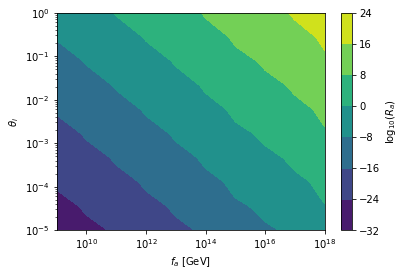

Text(0,0.5,'$\\overline{R}_a$')

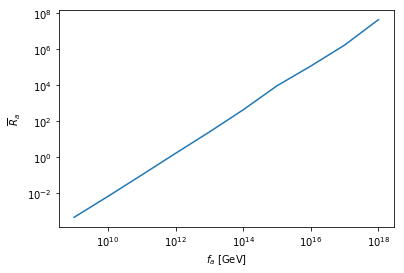

In [58]:
ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")
plt.xlabel("$f_a$ [GeV]")
plt.ylabel(r"$\theta_i$")
plt.contourf(f_a_s / 1e9, theta_i_s, np.log(R_a))
cbar = plt.colorbar() # orientation="horizontal")
cbar.ax.set_ylabel(r"$\log_{10}(R_a)$")
plt.show()
plt.loglog(f_a_s / 1e9, R_a_avg)
plt.xlabel("$f_a$ [GeV]")
plt.ylabel(r"$\overline{R}_a$")